<a href="https://colab.research.google.com/github/Swathi04/CMPE255_Dimensionality_Reduction_Assignment/blob/main/CMPE255_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA MINING ASSIGNMENT FOR DIMENSIONALITY REDUCTION

##TABULAR DATA PCA

###Necessary Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

###Kaggle setup to load dataset

In [ ]:
!rm -rf ~/.kaggle
!ls

sample_data


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"swathianandram","key":"dae954eb4b7a44cc4b214d95b296b334"}'}

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download sadeghjalalian/wine-customer-segmentation

  0% 0.00/4.42k [00:00<?, ?B/s]
100% 4.42k/4.42k [00:00<00:00, 6.16MB/s]


In [ ]:
!ls
!unzip wine-customer-segmentation.zip

kaggle.json  sample_data  wine-customer-segmentation.zip
Archive:  wine-customer-segmentation.zip
  inflating: Wine.csv                


###Load dataset

In [ ]:
data_frame = pd.read_csv('Wine.csv')
data_frame.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
data_frame.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [ ]:
data_frame.shape

(178, 14)

In [ ]:
X_variables = data_frame.iloc[:,0:4]
X_variables

,Alcohol,Malic_Acid,Ash,Ash_Alcanity
0,14.23,1.71,2.43,15.6
1,13.20,1.78,2.14,11.2
2,13.16,2.36,2.67,18.6
3,14.37,1.95,2.50,16.8
4,13.24,2.59,2.87,21.0
...,...,...,...,...
173,13.71,5.65,2.45,20.5
174,13.40,3.91,2.48,23.0
175,13.27,4.28,2.26,20.0
176,13.17,2.59,2.37,20.0


In [ ]:
y_variable = data_frame.iloc[:,5]
y_variable

0      2.80
1      2.65
2      2.80
3      3.85
4      2.80
       ... 
173    1.68
174    1.80
175    1.59
176    1.65
177    2.05
Name: Total_Phenols, Length: 178, dtype: float64

###Calculate the covariance matrix

In [ ]:
sc = StandardScaler()
transformed_df = sc.fit_transform(X_variables)
covariance_matrix = np.cov(transformed_df.T)
covariance_matrix

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972]])

###Calculate eigen values

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

###Calculate Eigen pairs

In [ ]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
0.31859893166726794
1.623818521449171
1.2231969015261401
0.8569845154139188


###PCA

In [ ]:
pca = PCA()
pca = pca.fit(transformed_df)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.40367399, 0.30408125, 0.2130425 , 0.07920226])

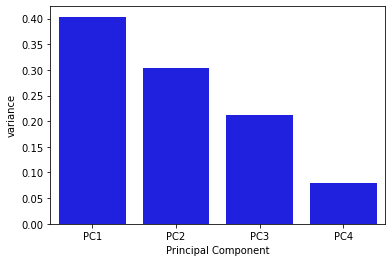

In [ ]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4']})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

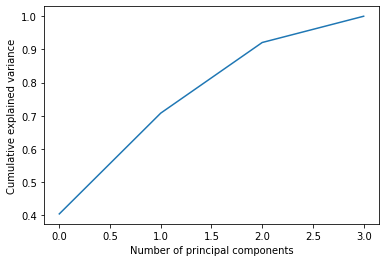

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
pca_2 = PCA(n_components =2 )
pca_2 = pca_2.fit(transformed_df)
pca_2d = pca_2.transform(X_variables)

In [ ]:
data_frame['Customer_Segment'] = data_frame['Customer_Segment'].replace({1:0, 2:1, 3:2})

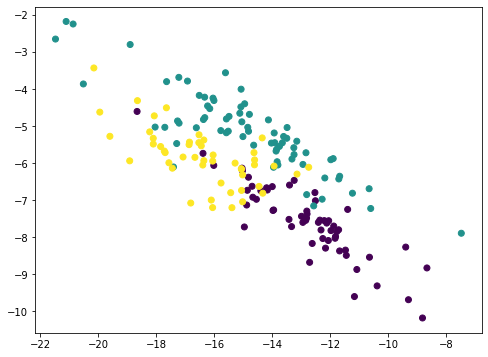

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(pca_2d[:,0], pca_2d[:,1],c=data_frame['Customer_Segment'])
plt.show()


##TABULAR DATA SVD

###Necessary Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

###Load Dataset

In [ ]:
data_frame = pd.read_csv('Wine.csv')
data_frame.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
data_frame.shape

(178, 14)

In [ ]:
encoder = LabelEncoder()
for col in data_frame.columns:
    data_frame[col] = encoder.fit_transform(data_frame[col])
data_frame.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,118,43,44,12,45,73,107,11,87,81,49,120,94,0
1,65,49,18,1,21,68,91,9,31,56,50,102,92,0
2,63,71,63,32,22,73,115,13,96,83,48,86,101,0
3,121,59,49,21,33,95,122,7,84,109,30,104,116,0
4,67,81,75,45,37,73,89,20,66,53,49,73,66,0


In [ ]:
X_variables = data_frame.iloc[:,1:23]
y_label = data_frame.iloc[:, 0]

In [ ]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X_variables)

In [ ]:
u, s, v = np.linalg.svd(X_features, full_matrices=True)

In [ ]:
u.shape

(178, 178)

In [ ]:
s.shape

(13,)

In [ ]:
v.shape

(13, 13)

Text(0, 0.5, 'Percent of the variance explained')

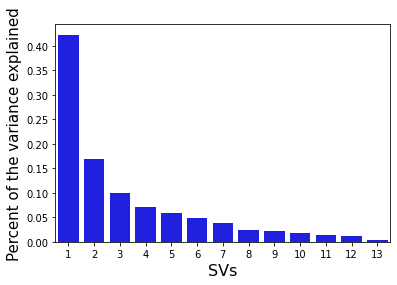

In [ ]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained)+1)),
            y=variance_explained, color="blue")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [ ]:
col_labels= ['SV'+str(i) for i in range(1,4)]
svd_df = pd.DataFrame(u[:,0:3], index=data_frame["Customer_Segment"].tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV1,SV2,SV3
0,0,-0.113791,0.073341,0.026347
1,0,-0.080462,-0.020416,0.125854
2,0,-0.084281,0.079697,-0.060358
3,0,-0.108895,0.118340,0.019817
4,0,-0.044362,0.075421,-0.135652


In [ ]:
svd_df['Class'] = svd_df['Class'].replace({0:'SV1', 1:'SV2', 2:'SV3'})

Text(0, 0.5, 'SV 2: 16.900000000000002%')

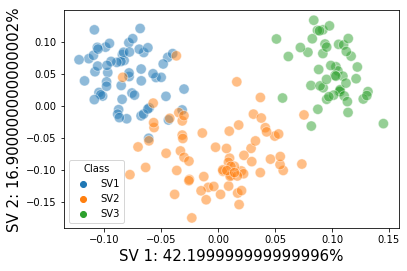

In [ ]:
sns.scatterplot(x="SV1", y="SV2", hue="Class", data=svd_df, s=105,alpha=0.5)
plt.xlabel('SV 1: {0}%'.format(variance_explained[0]*100), fontsize=15)
plt.ylabel('SV 2: {0}%'.format(variance_explained[1]*100), fontsize=15)

##TABULAR DATA LLE

###Necessary Import

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

###Check the dimensions

In [ ]:
data_frame.shape

(178, 14)

###Specify how much dimensions needs to be reduced

In [ ]:
embedding = LocallyLinearEmbedding(n_components=2).fit(data_frame)

In [ ]:
embedding

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
                       method='standard', modified_tol=1e-12, n_components=2,
                       n_jobs=None, n_neighbors=5, neighbors_algorithm='auto',
                       random_state=None, reg=0.001, tol=1e-06)

###Transform the data frame to the given number of dimensions

In [ ]:
lle = embedding.fit_transform(data_frame)

###Checking the new dimensions

In [ ]:
lle.shape

(178, 2)

###Visualisation of data

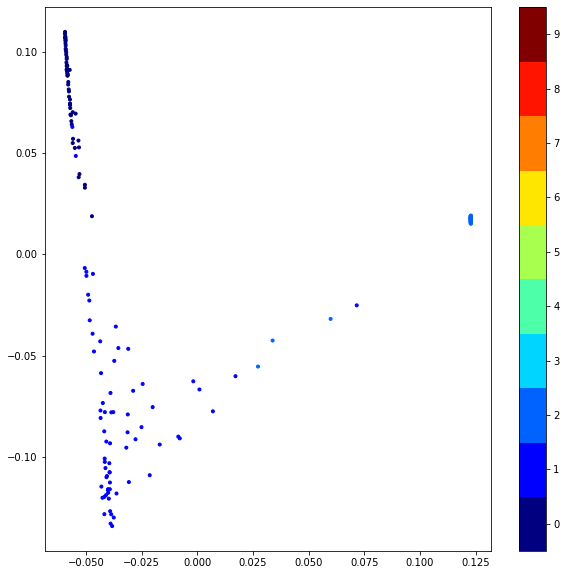

In [ ]:
plt.figure(figsize=(10,10))
vis_x = lle[:, 0]
vis_y = lle[:, 1]
plt.scatter(vis_x, vis_y, c=data_frame['Customer_Segment'], cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

##TABULAR DATA T-SNE

###Necessary Imports

In [ ]:
from sklearn.manifold import TSNE

###Checking the dimensions of original data

In [ ]:
data_frame.shape

(178, 14)

###Specifying the dimensions to which it needs to be reduced

In [ ]:
model=TSNE(n_components=2)

###Transform the data to the reduced number of dimensions

In [ ]:
tsne_data=model.fit_transform(data_frame)

###Check the new dimensions

In [ ]:
tsne_data.shape

(178, 2)

###The parameter “perplexity,” which says (loosely) how to balance attention between local and global aspects of your data. The parameter is, in a sense, a guess about the number of close neighbors each point has. 
###Perplexity 100

In [ ]:
model=TSNE(perplexity=100)
tsne_data=model.fit_transform(data_frame)

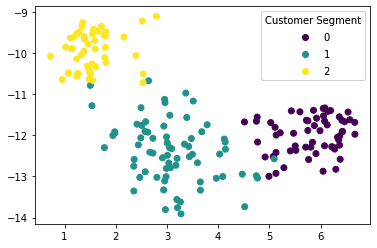

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_data[:,0],tsne_data[:,1], c=data_frame['Customer_Segment'])
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Customer Segment")
ax.add_artist(legend1)

###Perplexity 200

In [ ]:
model=TSNE(perplexity=200)
tsne_data=model.fit_transform(data_frame)

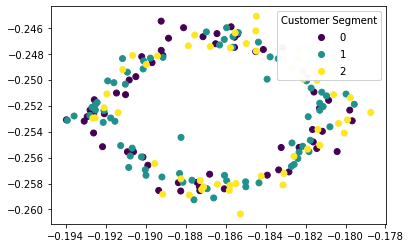

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_data[:,0],tsne_data[:,1], c=data_frame['Customer_Segment'])
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Customer Segment")
ax.add_artist(legend1)

###Perplexity 10000

In [ ]:
model=TSNE(perplexity=10000)
tsne_data=model.fit_transform(data_frame)

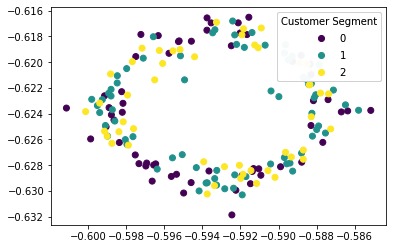

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_data[:,0],tsne_data[:,1], c=data_frame['Customer_Segment'])
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Customer Segment")
ax.add_artist(legend1)

##TABULAR DATA ISOMAP

###Necessary Imports

In [ ]:
from sklearn.manifold import Isomap

###Checking the original shape of data frame

In [ ]:
data_frame.shape

(178, 14)

###Applying Isomap transformation to the required number of dimensions

In [ ]:
model= Isomap(n_components=2).fit_transform(data_frame)

###Plotting the graph

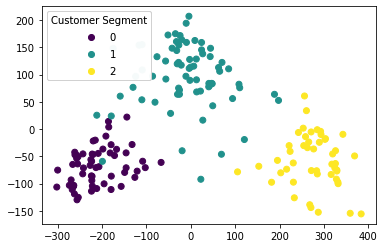

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(model[:,0],model[:,1], c=data_frame['Customer_Segment'])
legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="Customer Segment")
ax.add_artist(legend1)

##TABULAR DATA UMAP

###Installing necessary libraries

In [ ]:
!pip install umap-learn[plot]

     |████████████████████████████████| 86 kB 2.6 MB/s 
     |████████████████████████████████| 1.1 MB 24.1 MB/s 
     |████████████████████████████████| 15.8 MB 642 bytes/s 
     |████████████████████████████████| 76 kB 4.9 MB/s 
     |████████████████████████████████| 793 kB 67.0 MB/s 
     |████████████████████████████████| 132 kB 70.5 MB/s 
     |████████████████████████████████| 793 kB 83.2 MB/s 
     |████████████████████████████████| 791 kB 69.0 MB/s 
     |████████████████████████████████| 786 kB 72.3 MB/s 
     |████████████████████████████████| 779 kB 42.1 MB/s 
     |████████████████████████████████| 778 kB 77.4 MB/s 
     |████████████████████████████████| 776 kB 61.1 MB/s 
     |████████████████████████████████| 769 kB 68.3 MB/s 
     |████████████████████████████████| 766 kB 89.3 MB/s 
     |████████████████████████████████| 1.0 MB 63.0 MB/s 
     |████████████████████████████████| 722 kB 83.9 MB/s 
     |████████████████████████████████| 722 kB 67.5 MB/s 
     |█████████

###Necessary Imports

In [ ]:
import umap

###Checking the dimensions of the original data frame

In [ ]:
data_frame.shape

(178, 14)

###Using UMAP to reduce the number of dimensions

In [ ]:
reducer=umap.UMAP()
embedding=reducer.fit_transform(data_frame)
embedding.shape

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(178, 2)

###Plotting the reduced dimensions graph

Text(0.5, 1.0, 'UMAP PROJECTION OF THE WINE DATA')

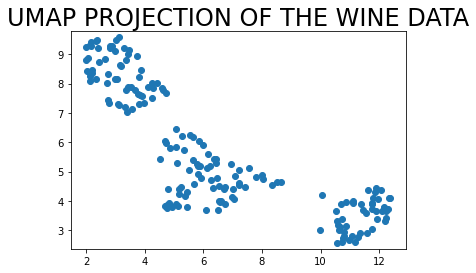

In [ ]:
plt.scatter(embedding[:,0],embedding[:,1])
plt.gca().set_aspect('equal','datalim')
plt.title('UMAP PROJECTION OF THE WINE DATA', fontsize=24)

##IMAGE DATASET PCA

###Necessary Imports

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

###Kaggle setup to load dataset

In [ ]:
!kaggle competitions download -c Kannada-MNIST

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 131MB/s]
  0% 0.00/818k [00:00<?, ?B/s]
100% 818k/818k [00:00<00:00, 272MB/s]
 52% 5.00M/9.71M [00:00<00:00, 22.0MB/s]
100% 9.71M/9.71M [00:00<00:00, 38.5MB/s]
  0% 0.00/33.1k [00:00<?, ?B/s]
100% 33.1k/33.1k [00:00<00:00, 33.3MB/s]


In [ ]:
!ls
!unzip Dig-MNIST.csv.zip

Dig-MNIST.csv.zip  sample_submission.csv  Wine.csv
kaggle.json	   test.csv.zip		  wine-customer-segmentation.zip
sample_data	   train.csv.zip
Archive:  Dig-MNIST.csv.zip
  inflating: Dig-MNIST.csv           


###Load dataset

In [ ]:
data_frame_image = pd.read_csv('Dig-MNIST.csv')
data_frame_image.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_frame_image.shape

(10240, 785)

In [ ]:
data_frame_image.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,10240.000000,10240.0,10240.0,10240.0,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.0,10240.0,10240.000000,10240.000000,10240.0,10240.000000,10240.000000,10240.0,10240.000000,10240.000000,10240.000000,10240.0,10240.0,10240.0,10240.0,10240.000000,10240.000000,10240.0,10240.0,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,...,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.0,10240.0,10240.0,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.00000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.0,10240.000000,10240.0,10240.0
mean,4.500000,0.0,0.0,0.0,0.019629,0.015820,0.045410,0.023047,0.048828,0.032910,0.040430,0.014941,0.0,0.0,0.007910,0.033691,0.0,0.025684,0.025391,0.0,0.012402,0.005957,0.011816,0.0,0.0,0.0,0.0,0.016992,0.016992,0.0,0.0,0.019922,0.019629,0.059473,0.060254,0.195605,0.071484,0.080957,0.068750,0.116309,...,0.356543,0.373340,0.413574,0.512109,0.689453,0.546484,0.528418,0.300195,0.220801,0.059766,0.039844,0.0,0.0,0.0,0.024902,0.013086,0.024902,0.012402,0.090625,0.054785,0.068359,0.095020,0.099414,0.059766,0.045020,0.02041,0.044336,0.071387,0.082227,0.061328,0.027539,0.049805,0.027441,0.029883,0.103223,0.039844,0.0,0.019922,0.0,0.0
std,2.872422,0.0,0.0,0.0,1.986306,1.600903,2.926116,1.698099,3.494384,2.646949,2.969541,1.511964,0.0,0.0,0.800452,2.443329,0.0,2.058578,1.509465,0.0,1.255029,0.602809,1.195736,0.0,0.0,0.0,0.0,1.719488,1.719488,0.0,0.0,2.015952,1.986306,3.474360,3.520035,6.268928,3.981102,3.910837,3.574218,4.882009,...,8.467775,8.184176,9.188977,9.995812,11.972118,10.699255,10.827135,8.318151,6.772284,3.491390,2.850847,0.0,0.0,0.0,2.519940,1.324204,2.519940,1.255029,4.607644,3.304578,3.679171,4.500204,4.542480,3.491390,2.607738,1.58728,2.947830,4.010081,4.125187,3.327539,2.222074,3.563559,2.397978,2.253815,4.727705,2.850847,0.0,2.015952,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [ ]:
pca = PCA(2)
projected_value = pca.fit_transform(data_frame_image)
projected = pca.inverse_transform(projected_value)
print(data_frame_image.shape)
print(projected_value.shape)

(10240, 785)
(10240, 2)


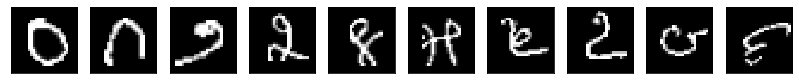

In [ ]:
image_vec = data_frame_image.drop('label',axis=1)
plt.figure(figsize=(14,14))
for digit_num in range(0,10):
    plt.subplot(1,10,digit_num+1)
    grid_data = image_vec.iloc[digit_num].to_numpy().reshape(28,28)
    plt.imshow(grid_data, interpolation = "none", cmap = "gray")
    plt.xticks([])
    plt.yticks([])
plt.show()

Text(0, 0.5, 'Cumulative Explained Variance')

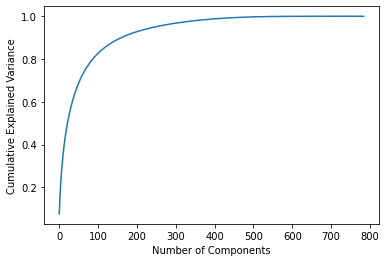

In [ ]:
pca = PCA().fit(data_frame_image)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

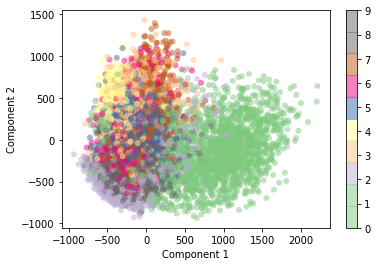

In [ ]:
plt.scatter(projected_value[:, 0], projected_value[:, 1], c=data_frame_image['label'],edgecolors='none',alpha=0.5, cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()

##IMAGE DATASET SVD

###Necessary Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

###Load Dataset

In [ ]:
data_frame_image = pd.read_csv('Dig-MNIST.csv')
data_frame_image.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_frame_image.shape

(10240, 785)

In [ ]:
encoder = LabelEncoder()
for col in data_frame_image.columns:
    data_frame_image[col] = encoder.fit_transform(data_frame_image[col])
data_frame_image.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_variables = data_frame_image.iloc[:,1:23]
y_label = data_frame_image.iloc[:, 0]

In [ ]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X_variables)

In [ ]:
u, s, v = np.linalg.svd(X_features, full_matrices=True)

In [ ]:
u.shape

(10240, 10240)

In [ ]:
s.shape

(22,)

In [ ]:
v.shape

(22, 22)

Text(0, 0.5, 'Percent of the variance explained')

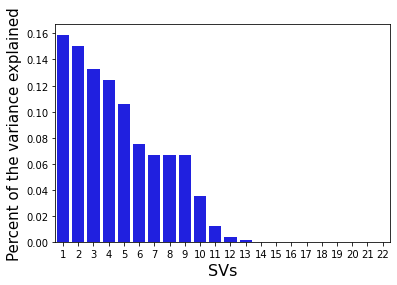

In [ ]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained)+1)),
            y=variance_explained, color="blue")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [ ]:
col_labels= ['SV'+str(i) for i in range(1,11)]
svd_df = pd.DataFrame(u[:,0:10], index=data_frame_image['label'].tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV1,SV2,SV3,SV4,SV5,SV6,SV7,SV8,SV9,SV10
0,0,-0.000158,0.000225,0.000098,0.000026,0.000009,-0.000038,0.000000e+00,0.000000e+00,-0.000169,-0.000015
1,1,-0.000158,0.000225,0.000098,0.000026,0.000009,-0.000038,2.776470e-17,-8.329411e-17,-0.000169,-0.000015
2,2,-0.000158,0.000225,0.000098,0.000026,0.000009,-0.000038,1.110425e-16,-2.778574e-17,-0.000169,-0.000015
3,3,-0.000158,0.000225,0.000098,0.000026,0.000009,-0.000038,3.772743e-17,3.064516e-17,-0.000169,-0.000015
4,4,-0.000158,0.000225,0.000098,0.000026,0.000009,-0.000038,7.072391e-17,-2.662556e-17,-0.000169,-0.000015


In [ ]:
svd_df['Class'] = svd_df['Class'].replace({0:'SV1', 1:'SV2', 2:'SV3', 3: 'SV4', 4: 'SV5', 5: 'SV6', 6: 'SV7', 7: 'SV8', 8: 'SV9', 9: 'SV10'})

Text(0, 0.5, 'SV 2: 15.0%')

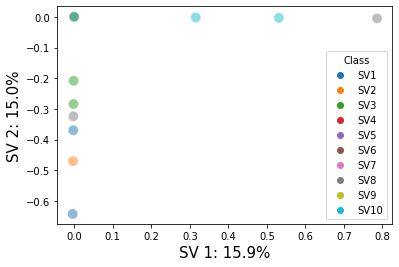

In [ ]:
sns.scatterplot(x="SV1", y="SV2", hue="Class", data=svd_df, s=105,alpha=0.5)
plt.xlabel('SV 1: {0}%'.format(variance_explained[0]*100), fontsize=15)
plt.ylabel('SV 2: {0}%'.format(variance_explained[1]*100), fontsize=15)

##IMAGE DATASET LLE

###Necessary Import

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

###Check the dimensions

In [ ]:
data_frame_image.shape

(10240, 785)

###Specify how much dimensions needs to be reduced

In [ ]:
embedding = LocallyLinearEmbedding(n_components=2).fit(data_frame_image)

In [ ]:
embedding

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
                       method='standard', modified_tol=1e-12, n_components=2,
                       n_jobs=None, n_neighbors=5, neighbors_algorithm='auto',
                       random_state=None, reg=0.001, tol=1e-06)

###Transform the data frame to the given number of dimensions

In [ ]:
lle = embedding.fit_transform(data_frame_image)

###Checking the new dimensions

In [ ]:
lle.shape

(10240, 2)

###Visualisation of data

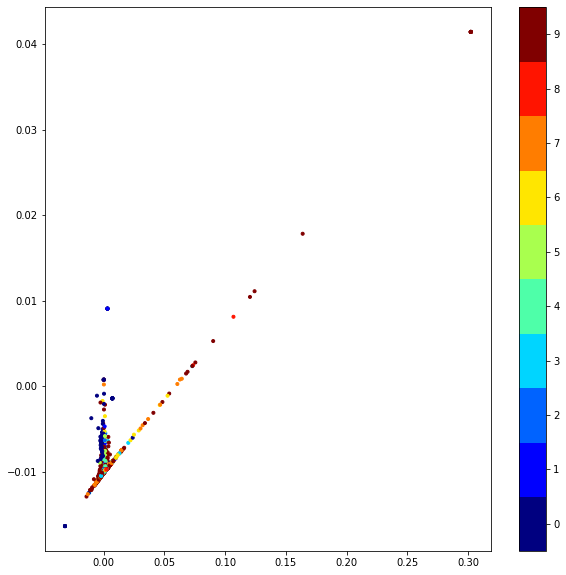

In [ ]:
plt.figure(figsize=(10,10))
vis_x = lle[:, 0]
vis_y = lle[:, 1]
plt.scatter(vis_x, vis_y, c=data_frame_image['label'], cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

##IMAGE DATASET T-SNE

###Necessary Imports

In [ ]:
from sklearn.manifold import TSNE

###Checking the dimensions of original data

In [ ]:
data_frame_image.shape

(10240, 785)

###Specifying the dimensions to which it needs to be reduced

In [ ]:
model=TSNE(n_components=2)

###Transform the data to the reduced number of dimensions

In [ ]:
tsne_data=model.fit_transform(data_frame_image)

###Check the new dimensions

In [ ]:
tsne_data.shape

(10240, 2)

###The parameter “perplexity,” which says (loosely) how to balance attention between local and global aspects of your data. The parameter is, in a sense, a guess about the number of close neighbors each point has. 
###Perplexity 100

In [ ]:
model=TSNE(perplexity=100)
tsne_data=model.fit_transform(data_frame_image)

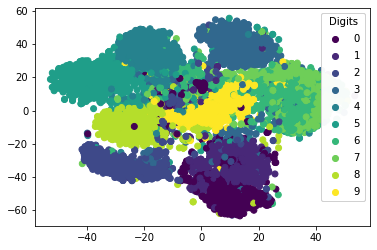

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_data[:,0],tsne_data[:,1], c=data_frame_image['label'])
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Digits")
ax.add_artist(legend1)

###Perplexity 200

In [ ]:
model=TSNE(perplexity=200)
tsne_data=model.fit_transform(data_frame_image)

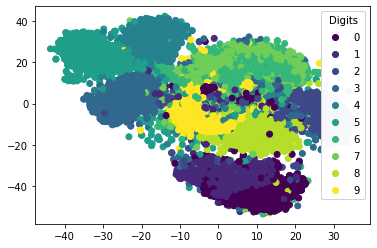

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_data[:,0],tsne_data[:,1], c=data_frame_image['label'])
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Digits")
ax.add_artist(legend1)

###Perplexity 10000

In [ ]:
model=TSNE(perplexity=10000)
tsne_data=model.fit_transform(data_frame_image)

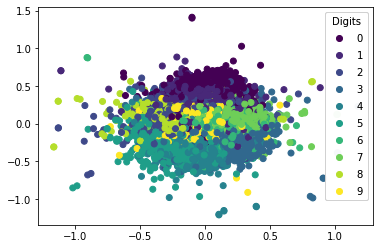

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_data[:,0],tsne_data[:,1], c=data_frame_image['label'])
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Digits")
ax.add_artist(legend1)

##IMAGE DATASET ISOMAP

###Necessary Imports

In [ ]:
from sklearn.manifold import Isomap

###Checking the original shape of data frame

In [ ]:
data_frame_image.shape

(10240, 785)

###Applying Isomap transformation to the required number of dimensions

In [ ]:
model= Isomap(n_components=2).fit_transform(data_frame_image)

###Plotting the graph

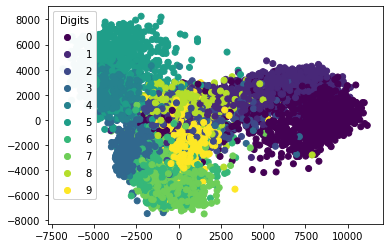

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(model[:,0],model[:,1], c=data_frame_image['label'])
legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="Digits")
ax.add_artist(legend1)

##IMAGE DATASET UMAP

###Installing necessary libraries

In [ ]:
!pip install umap-learn[plot]

###Necessary Imports

In [ ]:
import umap

###Checking the dimensions of the original data frame

In [ ]:
data_frame_image.shape

(10240, 785)

###Using UMAP to reduce the number of dimensions

In [ ]:
reducer=umap.UMAP()
embedding=reducer.fit_transform(data_frame_image)
embedding.shape

(10240, 2)

###Plotting the reduced dimensions graph

Text(0.5, 1.0, 'UMAP PROJECTION OF THE KANNADA DIGITS DATA')

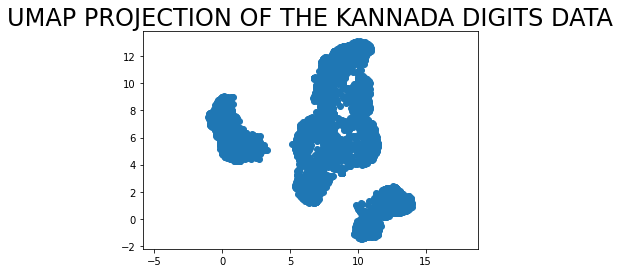

In [ ]:
plt.scatter(embedding[:,0],embedding[:,1])
plt.gca().set_aspect('equal','datalim')
plt.title('UMAP PROJECTION OF THE KANNADA DIGITS DATA', fontsize=24)